# Homework Assignment 3

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

Important Note: You can use a reltaviely small subset of the big dataset.

**Question 1:** Using Vaex, write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [1]:
# !pip install turicreate

In [2]:
# !pip install vaex

In [3]:
import vaex

# Load a subset of the dataset
df_subset = vaex.from_csv('library-collection-inventory.csv', nrows=10000) 

In [4]:
# Print the column names in the subset
print(df_subset.column_names)

['BibNum', 'Title', 'Author', 'ISBN', 'PublicationYear', 'Publisher', 'Subjects', 'ItemType', 'ItemCollection', 'FloatingItem', 'ItemLocation', 'ReportDate', 'ItemCount']


In [5]:
import vaex
import re

def find_most_popular_book(subset_df, subject):
     
    subject_filter = df_subset[df_subset['Subjects'].str.contains('Mystery fiction')
                              ].sort('ItemCount', ascending = False).head(1)

    return subject_filter['Title'].values[0]

# Example usage
subject = 'Mystery Fiction'
most_popular_book = find_most_popular_book(df_subset, subject)

print(f"The most popular book in '{subject}' is: {most_popular_book}")

The most popular book in 'Mystery Fiction' is: No shred of evidence / Charles Todd.


**Question 2**: Using Vaex, find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [6]:
from collections import defaultdict

fiction_subjects = df_subset[df_subset['Subjects'].str.contains('fiction')]

# Create a dictionary to store occurrences of fiction parts
fiction_dict = defaultdict(int)

# Iterate over each part separated by commas
for i in range(len(fiction_subjects)):
    for part in str(fiction_subjects['Subjects'].values[i]).split(','):
        if 'fiction' in part.lower():
            fiction_dict[part.strip()] += 1
    
# Sort the dictionary items by count in descending order
sorted_fiction = sorted(fiction_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 entries
for part, count in sorted_fiction[:10]:
    print(f"{part}: {count} occurrences")

Mystery fiction: 292 occurrences
Historical fiction: 198 occurrences
Friendship Fiction: 166 occurrences
Suspense fiction: 163 occurrences
Fantasy fiction: 129 occurrences
Science fiction: 128 occurrences
Murder Investigation Fiction: 123 occurrences
Schools Fiction: 113 occurrences
Psychological fiction: 106 occurrences
Domestic fiction: 104 occurrences


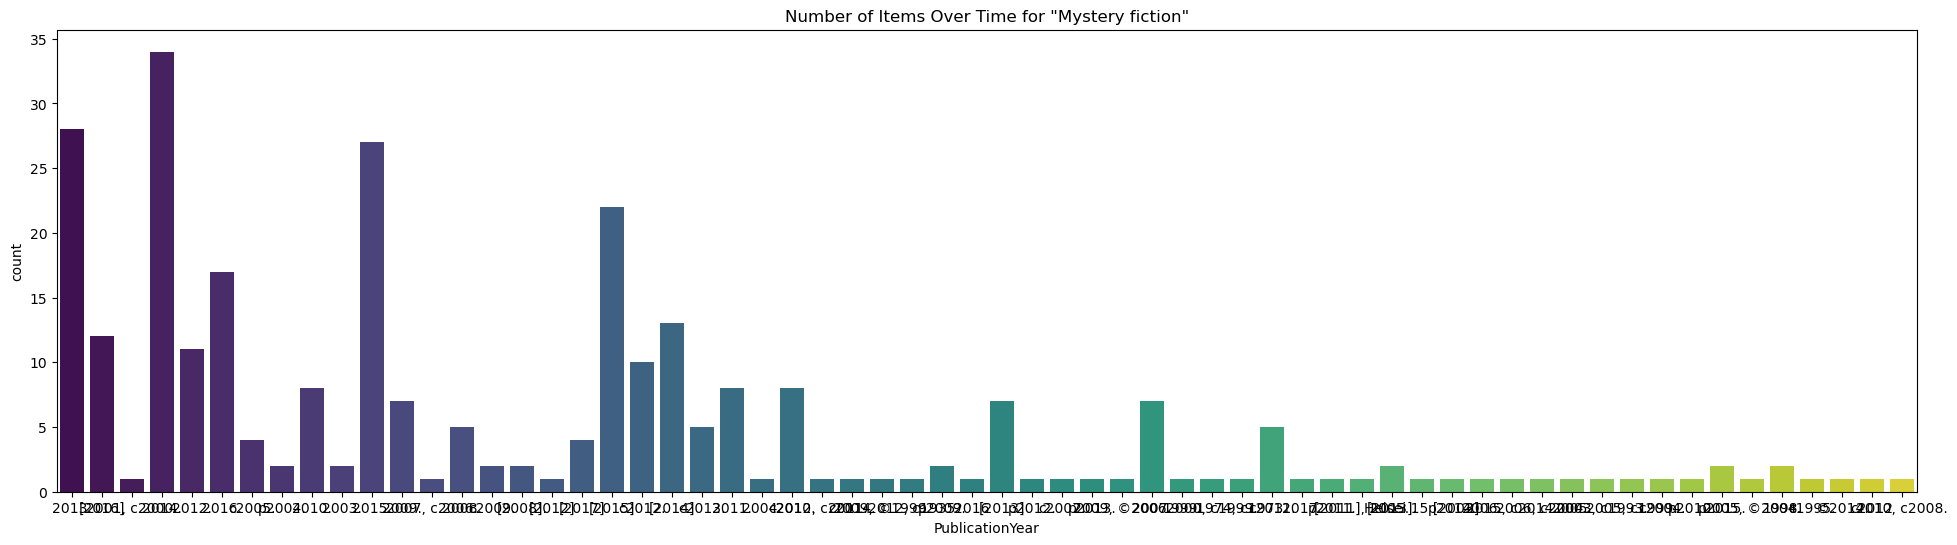

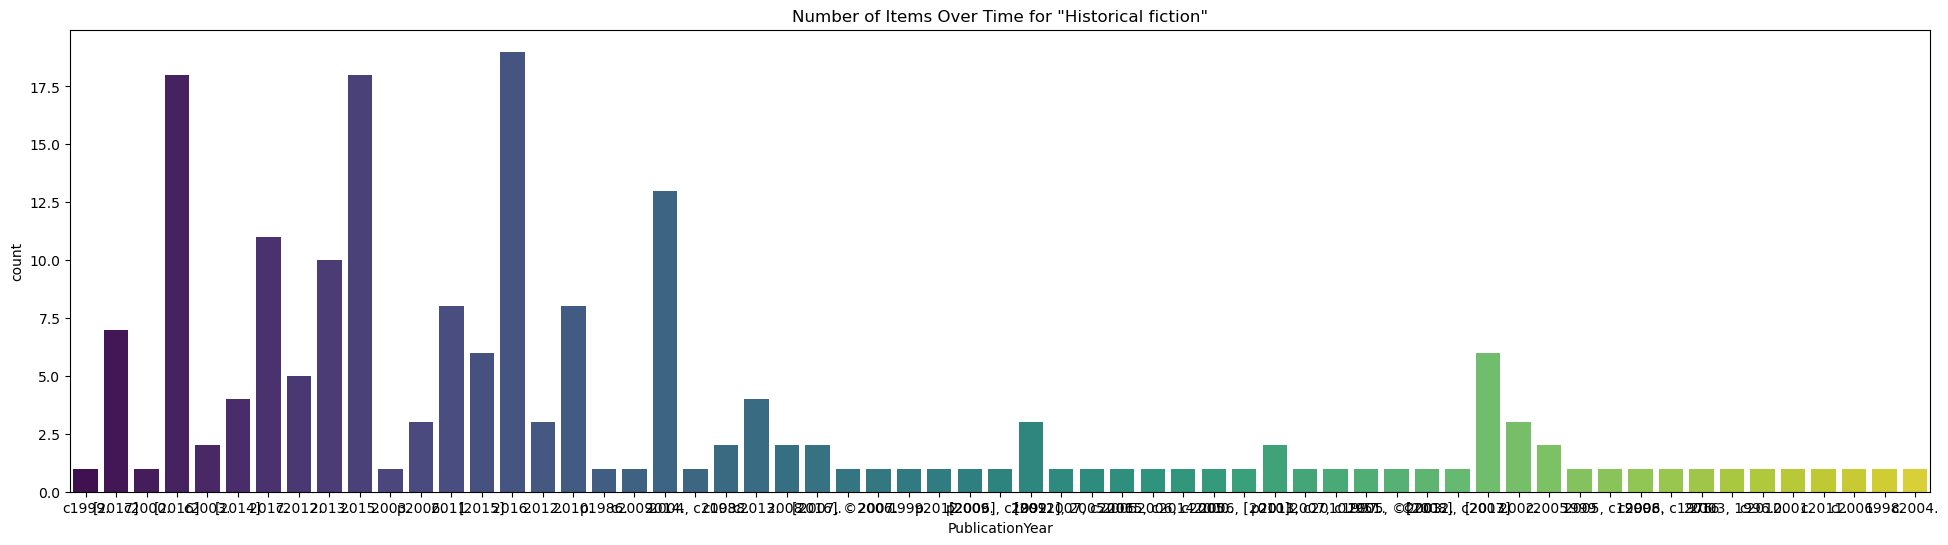

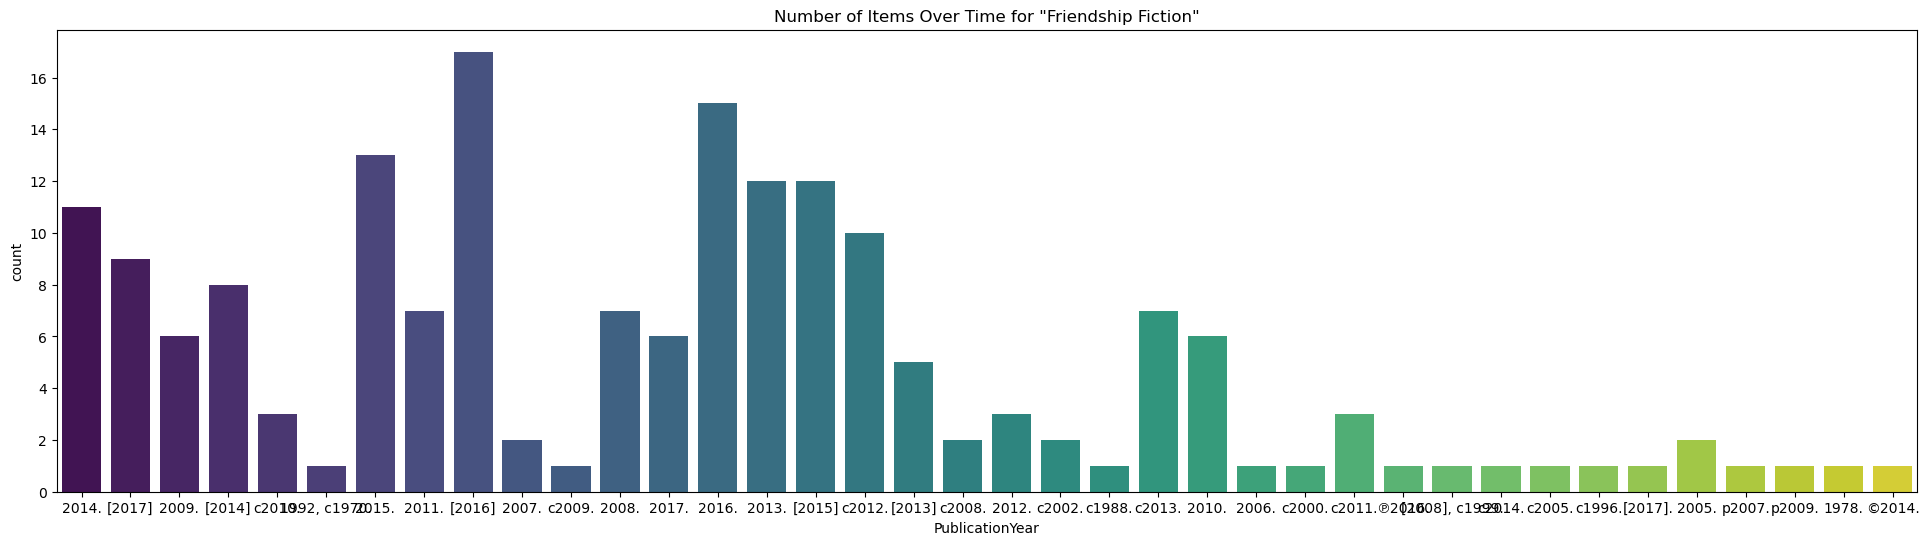

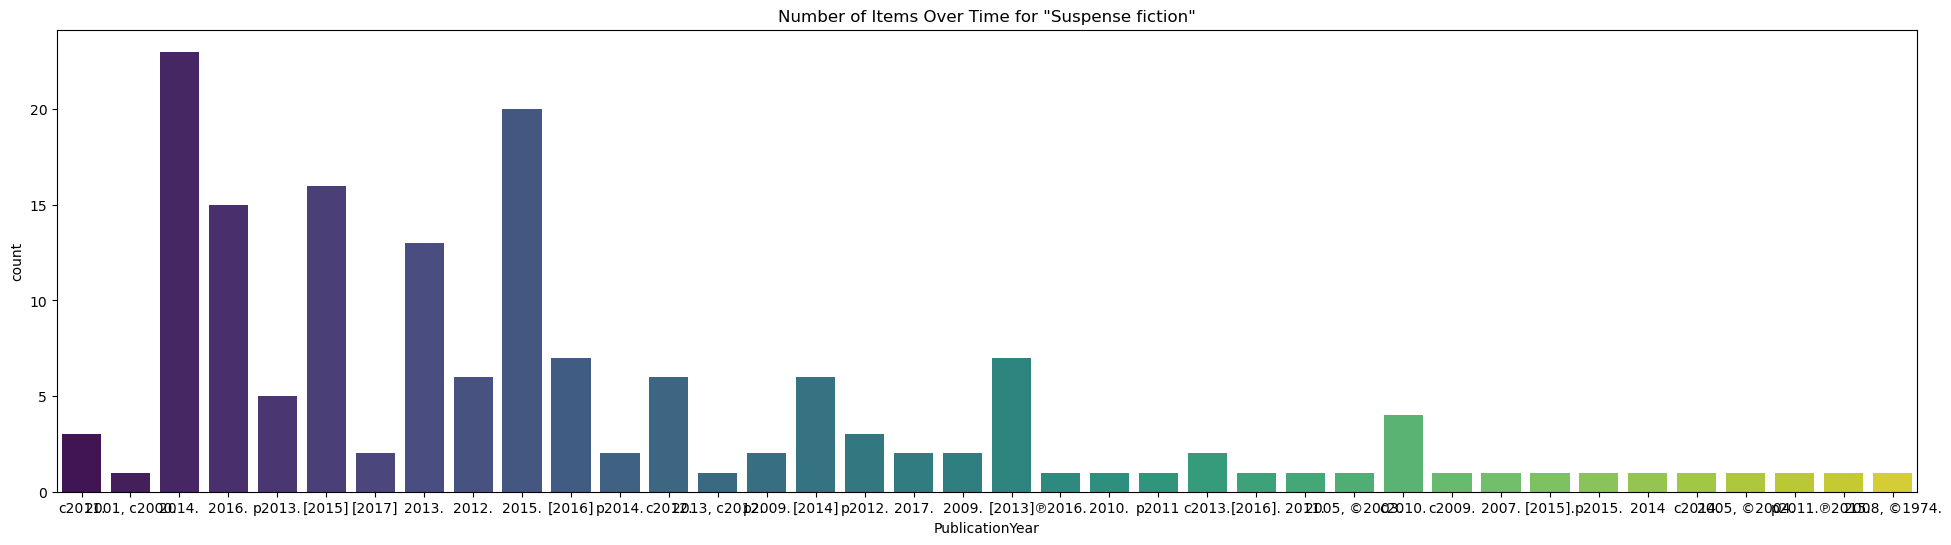

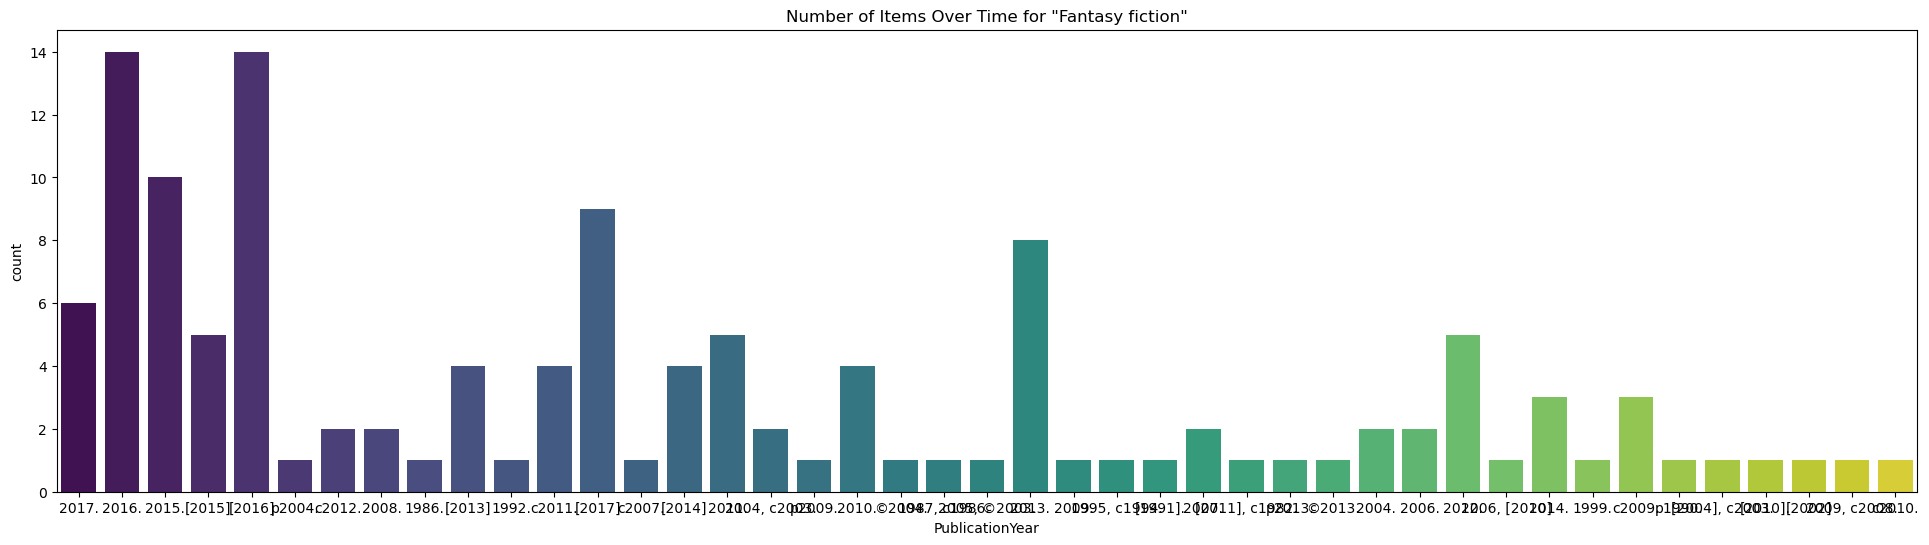

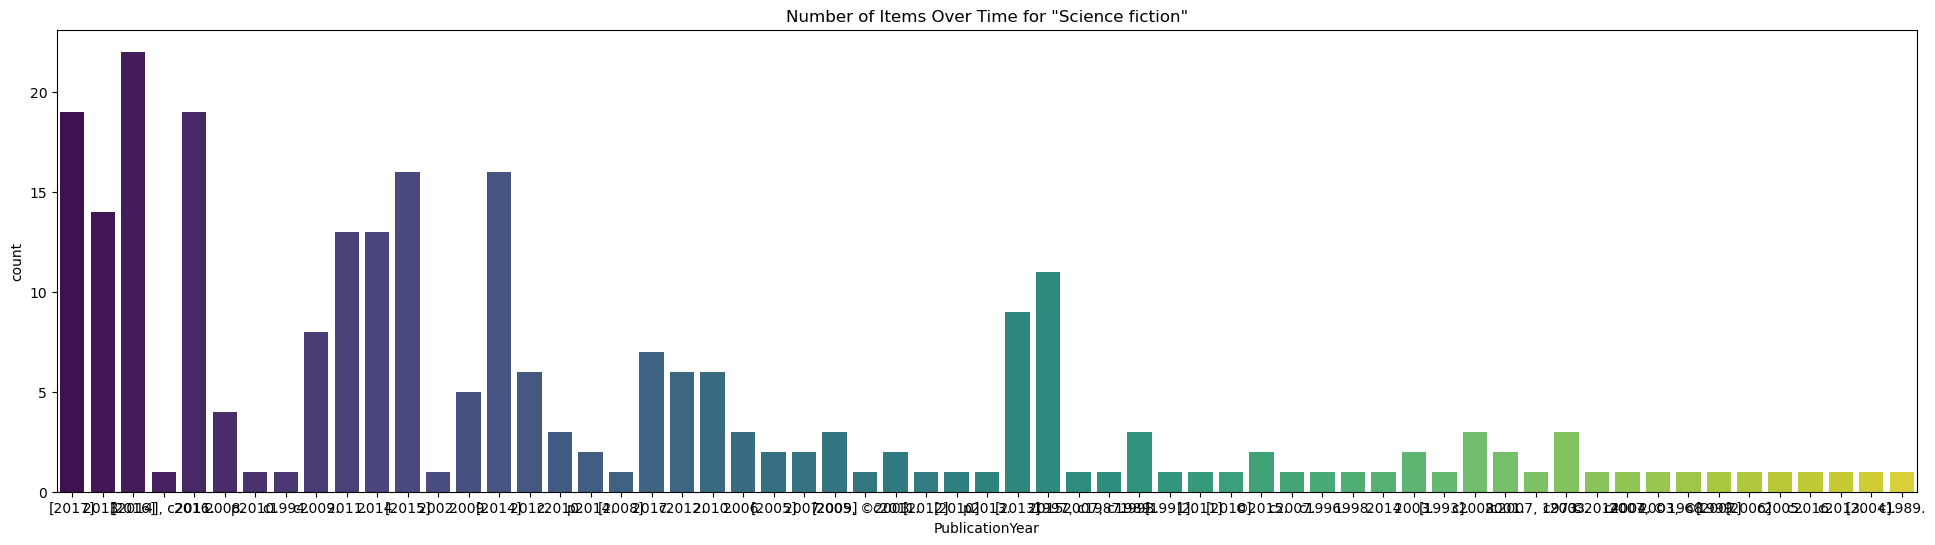

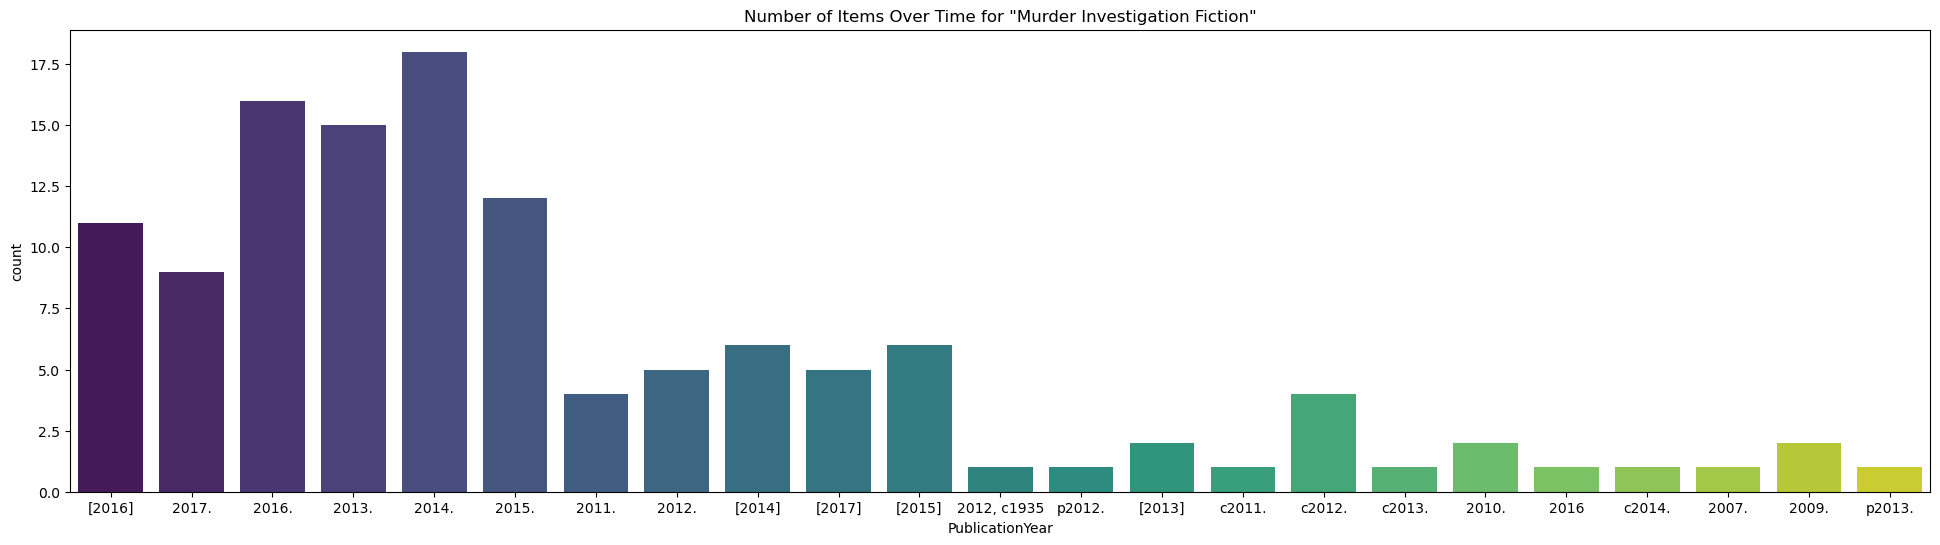

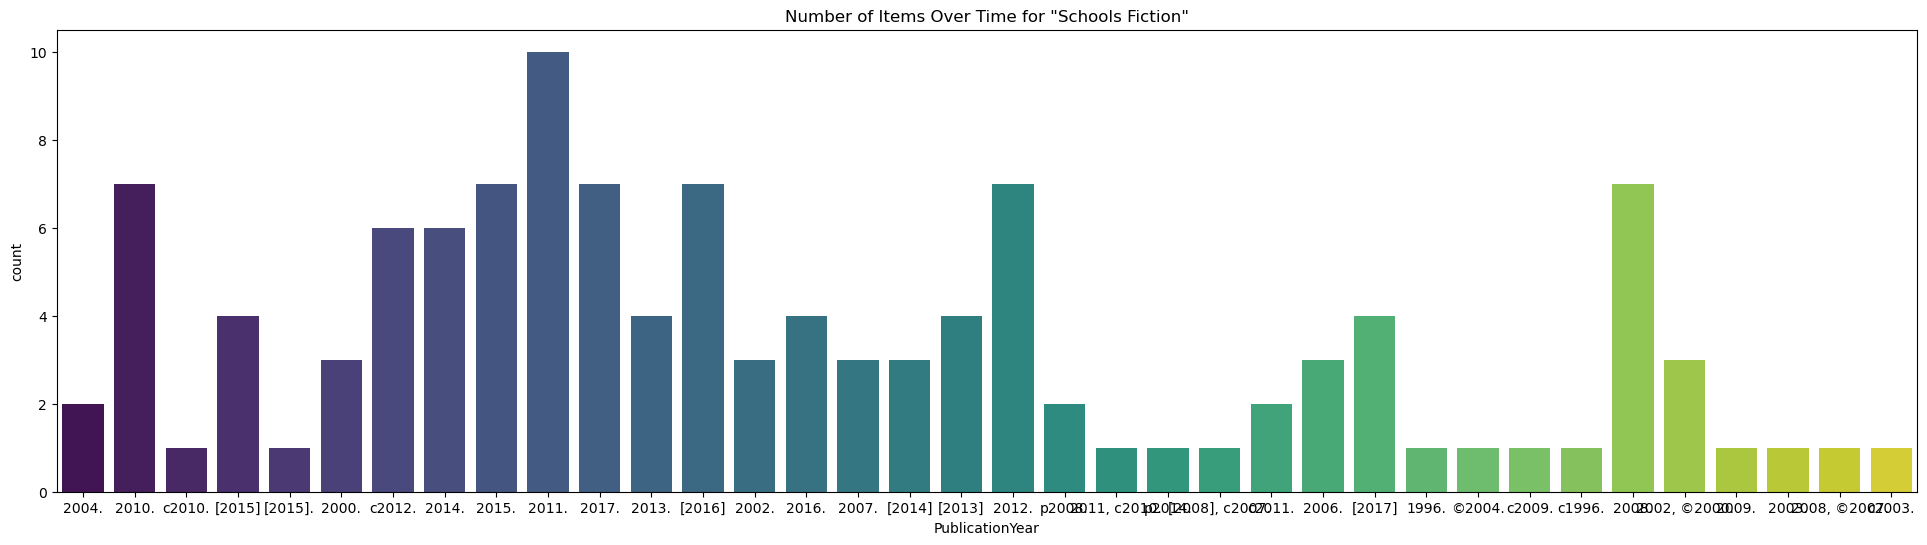

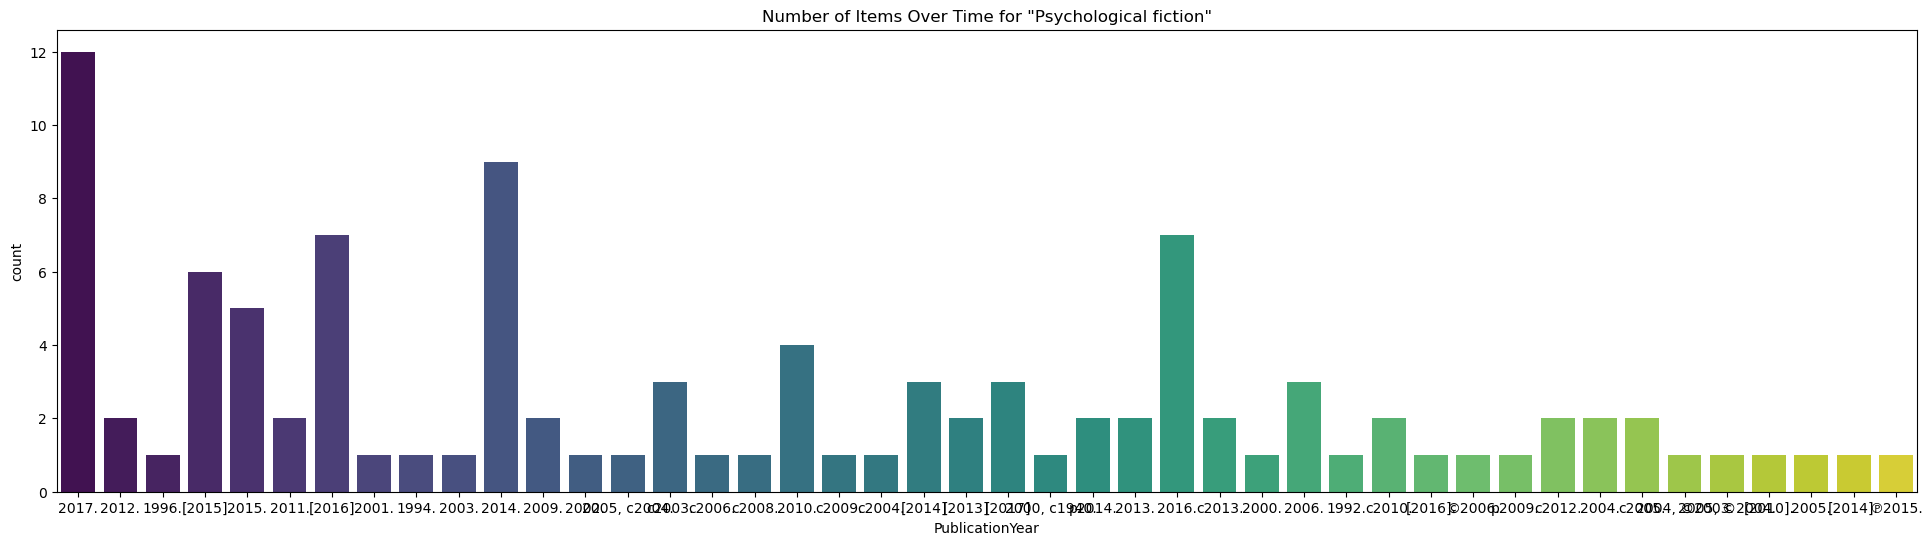

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(0,9):
    
    # Choose the subject to visualize
    subject_to_visualize = sorted_fiction[:10][i][0]
    
    # Step 1: Filter for the selected subject
    subject_subset = df_subset[df_subset['Subjects'].str.contains(subject_to_visualize)]
    
    # Step 2: Convert Vaex DataFrame to Pandas DataFrame
    subject_subset_pandas = subject_subset.to_pandas_df()
    
    # Step 3: Create a countplot using Seaborn
    plt.figure(figsize=(24, 6))
    sns.countplot(x='PublicationYear', data=subject_subset_pandas, palette='viridis')
    
    # Customize the plot
    plt.title(f'Number of Items Over Time for "{subject_to_visualize}"')
    plt.show()

**Question 3:** Using Vaex, write a function that gets as input a subject name. The function returns the top-20 most _popular_ authors for the input subject (15pt).



In [8]:
def top_authors_for_subject(df, subject):

    # Filter for the specified subject
    subject_subset = df[df['Subjects'].str.contains(subject)]
    
    subject_subset = df[df['Author'].notna()]

    # Create a dictionary to store occurrences of authors
    authors_dict = defaultdict(int)

    # Iterate over each row and update the dictionary
    for i in range(len(subject_subset)):
            authors_dict[subject_subset['Author'].values[i]] += 1

    # Sort the dictionary items by count in descending order
    sorted_authors = sorted(authors_dict.items(), key=lambda x: x[1], reverse=True)

    # Return the top 20 authors
    return sorted_authors[:20]

# Example usage:
subject_name = 'Mystery fiction'
top_authors = top_authors_for_subject(df_subset, subject_name)
print(f"Top 20 authors for '{subject_name}':")
for author, count in top_authors:
    print(f"{author}: {count} occurrences")

Top 20 authors for 'Mystery fiction':
Patterson, James, 1947-: 24 occurrences
Stilton, Geronimo: 18 occurrences
Seuss, Dr.: 12 occurrences
Jenkins, Steve, 1952-: 10 occurrences
Meadows, Daisy: 10 occurrences
King, Stephen, 1947-: 9 occurrences
Davis, Jim, 1945 July 28-: 8 occurrences
Osborne, Mary Pope: 8 occurrences
Willems, Mo: 8 occurrences
Hunter, Erin: 8 occurrences
Yolen, Jane: 8 occurrences
Bendis, Brian Michael: 7 occurrences
Pilkey, Dav, 1966-: 7 occurrences
Bunting, Eve, 1928-: 7 occurrences
Steves, Rick, 1955-: 7 occurrences
O'Connor, Jane: 7 occurrences
Stilton, Thea: 6 occurrences
Henkes, Kevin: 6 occurrences
Carle, Eric: 6 occurrences
Snicket, Lemony: 6 occurrences


Using the [The Blog Authorship Corpus](https://www.kaggle.com/rtatman/blog-authorship-corpus.htm) and Vaex, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic by gender(5pt).
Calculate the average and median age of bloggers according to their sign (5pt).
Visualize the age distributions  of bloggers according to their  topic and gender using Seaborn and PlotlyExpress(15pt)

In [9]:
# Did only average according to your answer in the classroom q&a.

import pandas as pd
import plotly.express as px

# Load the dataset using Vaex
df = vaex.read_csv('blogtext.csv', nrows=10000)

average_age_by_topic_gender = df.groupby(['topic', 'gender']).agg({'age': 'mean'}).to_pandas_df()
average_age_by_topic_gender

topic  gender        age
0        Telecommunications    male  24.000000
1         Sports-Recreation    male  17.287500
2          BusinessServices    male  24.188406
3          BusinessServices  female  25.000000
4   LawEnforcement-Security    male  37.000000
5                 Education    male  30.577320
6                 Education  female  25.098266
7                  Religion    male  42.000000
8                  Religion  female  24.000000
9                   Fashion    male  35.922318
10              Engineering    male  24.566929
11               Publishing  female  35.000000
12     Communications-Media    male  36.605263
13     Communications-Media  female  25.000000
14                     Arts    male  21.206897
15                     Arts  female  29.500000
16                Marketing  female  26.743590
17               Consulting    male  40.888889
18               Consulting  female  39.750000
19           HumanResources    male  45.000000
20               Automotive  female  23.000000
21                  Banking  female  31.312500
22               Non-Profit    male  27.704225
23                 Internet    male  22.795455
24                 Internet  female  37.297297
25        Museums-Libraries    male  26.000000
26        Museums-Libraries  female  23.000000
27               Accounting    male  25.000000
28               Accounting  female  26.000000
29                  Science    male  20.593220
30                  Science  female  26.000000
31               Technology    male  34.012801
32               Technology  female  24.763158
33        InvestmentBanking    male  33.000000
34                  Student    male  15.599537
35                  Student  female  16.568794
36                   indUnk    male  19.471698
37                   indUnk  female  24.729416
38                      Law  female  28.636364

In [10]:
average_age_by_sign = df.groupby('sign').agg({'age': 'mean'}).to_pandas_df()
average_age_by_sign

sign        age
0         Virgo  20.004237
1        Taurus  25.216749
2     Capricorn  18.348837
3        Pisces  24.411894
4        Gemini  26.126667
5         Libra  22.446029
6        Cancer  17.603175
7           Leo  20.318937
8   Sagittarius  29.049225
9      Aquarius  24.506130
10        Aries  34.649595
11      Scorpio  19.280124

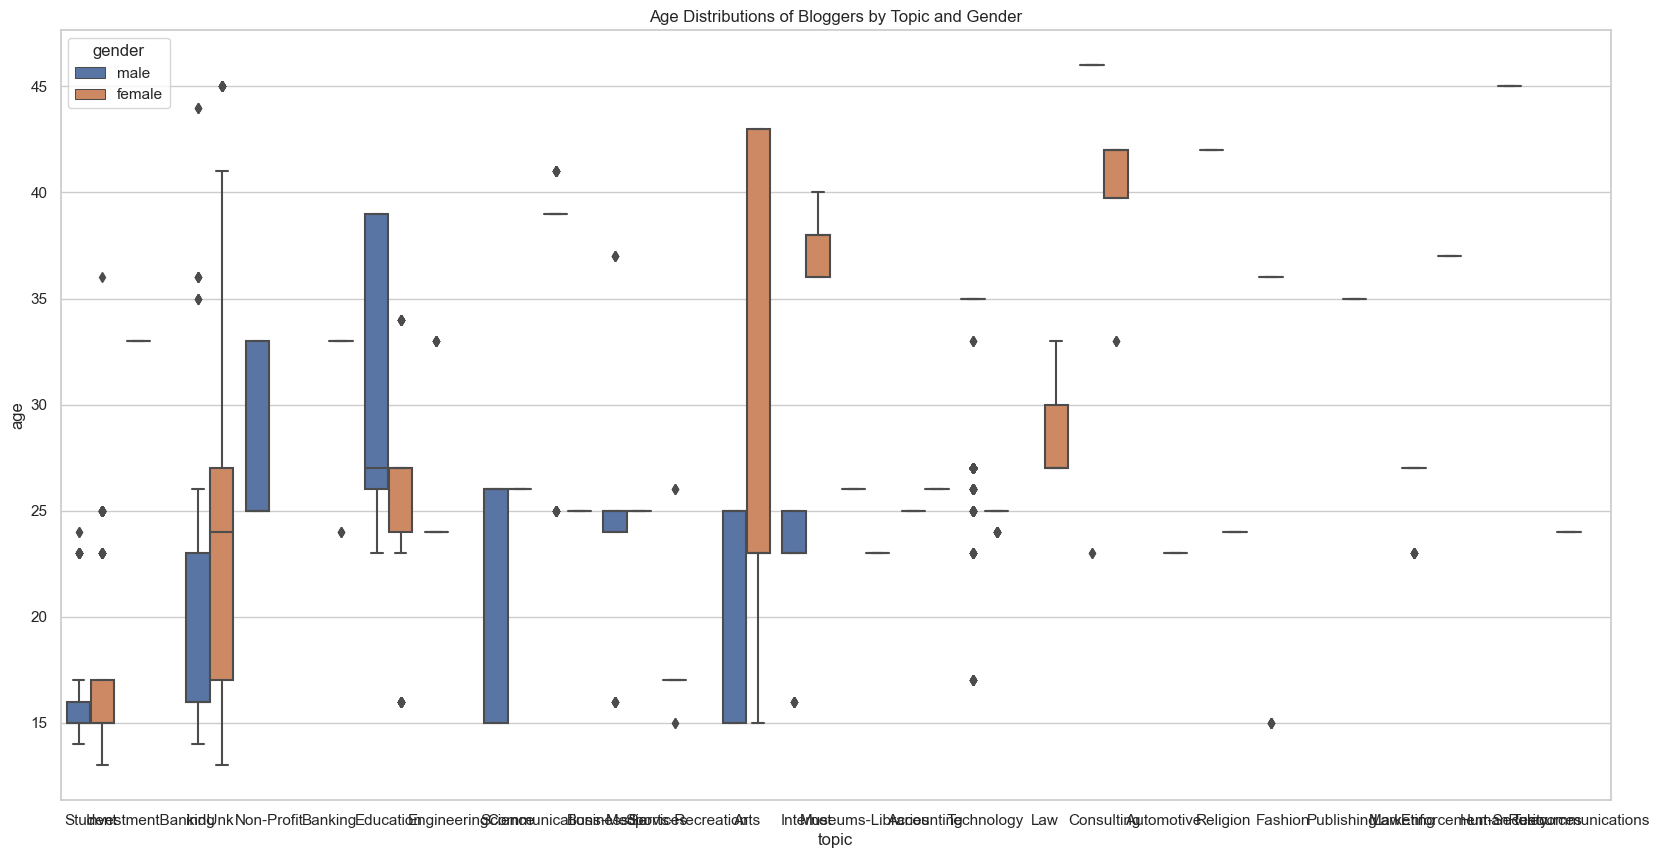

In [11]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.boxplot(x='topic', y='age', hue='gender', data=df.to_pandas_df())
plt.title('Age Distributions of Bloggers by Topic and Gender')
plt.show()

In [12]:
fig = px.box(df.to_pandas_df(), x='topic', y='age', color='gender', title='Age Distributions of Bloggers by Topic and Gender')
fig.show()

**Question 5:** Using the  [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


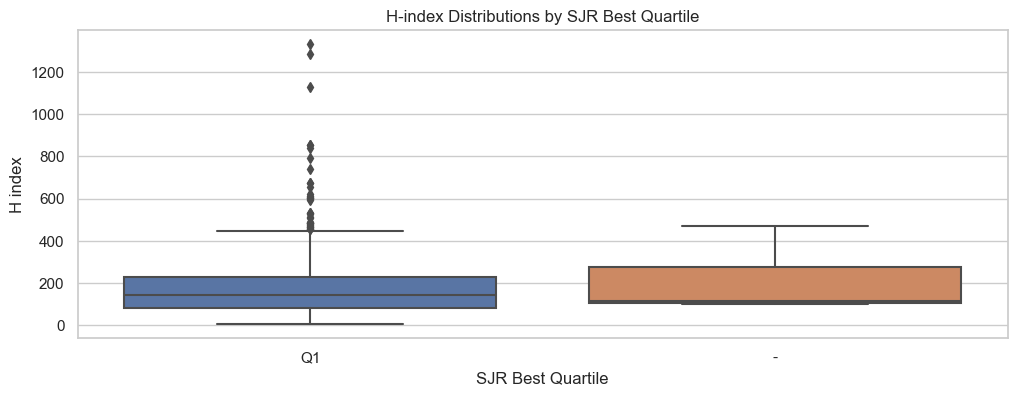

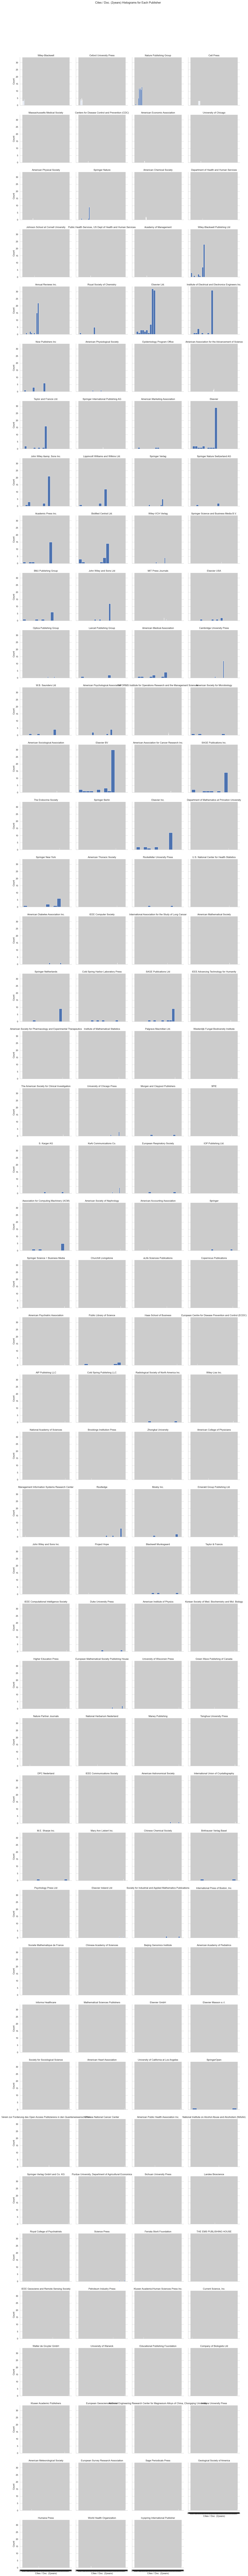

In [14]:
# Load the dataset with semicolon delimiter only for first 1000 rows! Q3 AND Q4 doesn't appear there! FYI
df = pd.read_csv('scimagojr 2022.csv', delimiter=';', nrows = 1000)

# Visualize H-index distributions according to SJR Best Quartile
plt.figure(figsize=(12, 4))
sns.boxplot(x='SJR Best Quartile', y='H index', data=df)
plt.title('H-index Distributions by SJR Best Quartile')
plt.show()

# Visualize Cites / Doc. (2years) histograms for each publisher using a grid
g = sns.FacetGrid(df, col='Publisher', col_wrap=4, height=4)
g.map(plt.hist, 'Cites / Doc. (2years)', bins=10)
g.set_titles('{col_name}')
g.set_axis_labels('Cites / Doc. (2years)', 'Count')
plt.suptitle('Cites / Doc. (2years) Histograms for Each Publisher', y=1.02)
plt.show()